In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load stock data
vix_stock_data = pd.read_csv('VixStockIndex.csv')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'], format='%Y/%m/%d')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'])
vix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10.95,11.07,9.52,9.77,9.77,0
1,2018-01-03,9.56,9.65,8.94,9.15,9.15,0
2,2018-01-04,9.01,9.31,8.92,9.22,9.22,0
3,2018-01-05,9.10,9.54,9.00,9.22,9.22,0
4,2018-01-08,9.61,9.89,9.32,9.52,9.52,0


In [3]:
vix_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       502 non-null    datetime64[ns]
 1   Open       502 non-null    float64       
 2   High       502 non-null    float64       
 3   Low        502 non-null    float64       
 4   Close      502 non-null    float64       
 5   Adj Close  502 non-null    float64       
 6   Volume     502 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.6 KB


In [5]:
vix_stock_data['Month'] = pd.DatetimeIndex(vix_stock_data['Date']).month
vix_stock_data['Day'] = pd.DatetimeIndex(vix_stock_data['Date']).day
vix_stock_data['Year'] = pd.DatetimeIndex(vix_stock_data['Date']).year
vix_stock_data = vix_stock_data.loc[vix_stock_data['Year'].isin([2018, 2019])]
vix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day,Year
0,2018-01-02,10.95,11.07,9.52,9.77,9.77,0,1,2,2018
1,2018-01-03,9.56,9.65,8.94,9.15,9.15,0,1,3,2018
2,2018-01-04,9.01,9.31,8.92,9.22,9.22,0,1,4,2018
3,2018-01-05,9.10,9.54,9.00,9.22,9.22,0,1,5,2018
4,2018-01-08,9.61,9.89,9.32,9.52,9.52,0,1,8,2018


In [6]:
print(vix_stock_data.shape)

(502, 10)


In [7]:
vix_stock_data_clean = vix_stock_data.loc[:, ['Month','Day','Year','Close']]
vix_stock_data_clean.head()

,Month,Day,Year,Close
0,1,2,2018,9.77
1,1,3,2018,9.15
2,1,4,2018,9.22
3,1,5,2018,9.22
4,1,8,2018,9.52


# SPOTIFY MUSIC

In [9]:
# Load Spotify top charts data
spotify_data = pd.read_csv('clean_music_file.csv')
spotify_data['date'] = pd.to_datetime(spotify_data['date'], format='%d/%m/%Y')
#spotify_data = spotify_data[~(spotify_data['date'] < '2019-01-01')]
spotify_data.reset_index()

spotify_data.head()

,date,position,track,title,artist,Country,Uri,Album/Single,Genre,Artist_followers,...,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive
0,2020-11-05,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2020-11-05,2.0,"Lemonade , Internet Money",Lemonade,Internet Money,USA,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,album,pop rap,159542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020-11-05,3.0,"34+35 , Ariana Grande",34+35,Ariana Grande,USA,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,album,dance pop,52571724.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2020-11-05,4.0,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez",USA,https://open.spotify.com/track/47EiUVwUp4C9fGc...,single,latin,26265604.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2020-11-05,5.0,"Mood , 24kGoldn",Mood,24kGoldn,USA,https://open.spotify.com/track/3tjFYV6RSFtuktY...,single,cali rap,490873.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
spotify_data = spotify_data[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]
spotify_data.head()

,date,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,...,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,2020-11-05,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-04,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-03,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-02,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-01,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
spotify_data['Month'] = pd.DatetimeIndex(spotify_data['date']).month
spotify_data['Day'] = pd.DatetimeIndex(spotify_data['date']).day
spotify_data['Year'] = pd.DatetimeIndex(spotify_data['date']).year
spotify_data.head()

,date,position,track,title,artist,Country,Uri,Album/Single,Genre,Artist_followers,...,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Month,Day,Year
0,2020-11-05,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,11,5,2020
1,2020-11-05,2.0,"Lemonade , Internet Money",Lemonade,Internet Money,USA,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,album,pop rap,159542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11,5,2020
2,2020-11-05,3.0,"34+35 , Ariana Grande",34+35,Ariana Grande,USA,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,album,dance pop,52571724.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,5,2020
3,2020-11-05,4.0,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez",USA,https://open.spotify.com/track/47EiUVwUp4C9fGc...,single,latin,26265604.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,11,5,2020
4,2020-11-05,5.0,"Mood , 24kGoldn",Mood,24kGoldn,USA,https://open.spotify.com/track/3tjFYV6RSFtuktY...,single,cali rap,490873.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,5,2020


In [12]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280184 entries, 0 to 280183
Columns: 117 entries, date to Year
dtypes: datetime64[ns](1), float64(101), int64(3), object(12)
memory usage: 250.1+ MB


In [13]:
spotify_data_final = spotify_data[['title', 'Month', 'Day', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]
spotify_data_final.head()

,title,Month,Day,Year,tempo,valence,key,danceability,energy
0,positions,11,5,2020,144.015,0.682,0.0,0.737,0.802
1,Lemonade,11,5,2020,140.042,0.462,1.0,0.800,0.658
2,34+35,11,5,2020,109.978,0.485,0.0,0.830,0.585
3,Dakiti,11,5,2020,109.928,0.145,4.0,0.731,0.573
4,Mood,11,5,2020,90.989,0.756,7.0,0.700,0.722


In [14]:
jan_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2018),:]
feb_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2018),:]
mar_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2018),:]
apr_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2018),:]
may_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2018),:]
jun_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2018),:]
jul_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2018),:]
aug_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2018),:]
sep_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2018),:]
octo_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2018),:]
nov_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2018),:]
dec_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2018),:]

In [15]:
jan_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2019),:]
feb_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2019),:]
mar_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2019),:]
apr_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2019),:]
may_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2019),:]
jun_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2019),:]
jul_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2019),:]
aug_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2019),:]
sep_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2019),:]
octo_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2019),:]
nov_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2019),:]
dec_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2019),:]

In [17]:
stock_mean = vix_stock_data_clean.groupby(['Month','Year']).mean().reset_index()
stock_mean = stock_mean.rename(columns={"Close":"Mean Closing Price"})
stock_mean.head()

,Month,Year,Day,Mean Closing Price
0,1,2018,16.380952,11.062381
1,1,2019,16.476190,19.572381
2,2,2018,14.473684,22.464737
3,2,2019,14.947368,15.234737
4,3,2018,15.380952,19.023810


In [18]:
stock_mean_clean = stock_mean.sort_values(["Year","Month"], ascending = True)
stock_mean_clean

,Month,Year,Day,Mean Closing Price
0,1,2018,16.380952,11.062381
2,2,2018,14.473684,22.464737
4,3,2018,15.380952,19.023810
6,4,2018,15.238095,18.267619
8,5,2018,15.454545,14.124545
10,6,2018,15.761905,13.678095
12,7,2018,16.523810,13.147619
14,8,2018,16.347826,12.546957
16,9,2018,16.157895,12.910526
18,10,2018,15.652174,19.352174


In [19]:
p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [jan_18, feb_18, mar_18, apr_18, may_18, jun_18, jul_18, aug_18, sep_18, octo_18, nov_18, dec_18,
          jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sep_19, octo_19, nov_19, dec_19]
counter = 0
months

[    Month  Day  Year  Close
 0       1    2  2018   9.77
 1       1    3  2018   9.15
 2       1    4  2018   9.22
 3       1    5  2018   9.22
 4       1    8  2018   9.52
 5       1    9  2018  10.08
 6       1   10  2018   9.82
 7       1   11  2018   9.88
 8       1   12  2018  10.16
 9       1   16  2018  11.66
 10      1   17  2018  11.91
 11      1   18  2018  12.22
 12      1   19  2018  11.27
 13      1   22  2018  11.03
 14      1   23  2018  11.10
 15      1   24  2018  11.47
 16      1   25  2018  11.58
 17      1   26  2018  11.08
 18      1   29  2018  13.84
 19      1   30  2018  14.79
 20      1   31  2018  13.54,
     Month  Day  Year      Close
 21      2    1  2018  13.470000
 22      2    2  2018  17.309999
 23      2    5  2018  37.320000
 24      2    6  2018  29.980000
 25      2    7  2018  27.730000
 26      2    8  2018  33.459999
 27      2    9  2018  29.059999
 28      2   12  2018  25.610001
 29      2   13  2018  24.969999
 30      2   14  2018  19.26000

In [20]:
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Close, second_month.Close, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_18 = months[counter]
        month_19 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_18.Close, month_19.Close, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [21]:
stock_mean_clean.loc[:, "p-value Previous Month"] = p_value_prior_month
stock_mean_clean.head()

,Month,Year,Day,Mean Closing Price,p-value Previous Month
0,1,2018,16.380952,11.062381,0.000000e+00
2,2,2018,14.473684,22.464737,3.128083e-07
4,3,2018,15.380952,19.023810,4.236191e-02
6,4,2018,15.238095,18.267619,3.635499e-01
8,5,2018,15.454545,14.124545,1.240668e-07


In [22]:
stock_mean_clean.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
stock_mean_clean_1 = stock_mean_clean.reset_index(drop=True)
stock_mean_clean_1

,Month,Year,Day,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month
0,1,2018,16.380952,11.062381,0.000000e+00,0.000000e+00
1,2,2018,14.473684,22.464737,3.128083e-07,0.000000e+00
2,3,2018,15.380952,19.023810,4.236191e-02,0.000000e+00
3,4,2018,15.238095,18.267619,3.635499e-01,0.000000e+00
4,5,2018,15.454545,14.124545,1.240668e-07,0.000000e+00
5,6,2018,15.761905,13.678095,3.849421e-01,0.000000e+00
6,7,2018,16.523810,13.147619,2.928569e-01,0.000000e+00
7,8,2018,16.347826,12.546957,7.665612e-02,0.000000e+00
8,9,2018,16.157895,12.910526,2.458504e-01,0.000000e+00
9,10,2018,15.652174,19.352174,4.508423e-07,0.000000e+00


In [23]:
spotify_mean = spotify_data_final.groupby(['Month','Year']).mean()
spotify_mean = spotify_mean.sort_values(by = ['Month','Year'], ascending = [True, True]).reset_index()
spotify_mean.head()

,Month,Year,Day,tempo,valence,key,danceability,energy
0,1,2017,16.000000,122.269194,0.445739,5.143550,0.681636,0.613384
1,1,2018,16.000000,121.334752,0.452045,5.542623,0.712875,0.617591
2,1,2019,16.000000,122.408762,0.427263,5.422756,0.726823,0.593969
3,1,2020,16.000000,121.593239,0.452568,5.341500,0.716308,0.575542
4,2,2017,14.185185,123.429402,0.429717,5.139799,0.684692,0.611398


In [24]:
spotify_mean_1 = spotify_mean.sort_values(["Year","Month"], ascending = True)
spotify_mean_2 = spotify_mean_1.loc[(spotify_mean_1['Year']==2018)|(spotify_mean_1['Year']==2019),:]
spotify_mean_3 = spotify_mean_2.reset_index(drop=True)
spotify_mean_3


,Month,Year,Day,tempo,valence,key,danceability,energy
0,1,2018,16.0,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,14.5,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,16.0,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,15.5,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,16.0,123.490716,0.445765,5.587216,0.709174,0.629488
5,6,2018,15.5,124.865443,0.447488,5.507265,0.703801,0.625334
6,7,2018,16.0,125.312722,0.424409,5.333093,0.717036,0.612107
7,8,2018,16.0,125.313587,0.424833,5.418388,0.712382,0.616659
8,9,2018,15.5,124.641441,0.426372,5.447005,0.716783,0.616159
9,10,2018,16.0,123.303754,0.432074,5.389153,0.727006,0.613353


In [25]:
merge_stock_spotify= pd.merge(stock_mean_clean_1,spotify_mean_3,on=['Month','Year'])
merge_stock_spotify.head()

,Month,Year,Day_x,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month,Day_y,tempo,valence,key,danceability,energy
0,1,2018,16.380952,11.062381,0.000000e+00,0.0,16.0,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,14.473684,22.464737,3.128083e-07,0.0,14.5,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,15.380952,19.023810,4.236191e-02,0.0,16.0,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,15.238095,18.267619,3.635499e-01,0.0,15.5,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,15.454545,14.124545,1.240668e-07,0.0,16.0,123.490716,0.445765,5.587216,0.709174,0.629488


In [26]:
spotify_data['Genre'].unique()

array(['dance pop', 'pop rap', 'latin', 'cali rap', 'brooklyn drill',
       'pop', 'canadian hip hop', 'canadian pop', 'contemporary country',
       'deep underground hip hop', 'chicago rap',
       'north carolina hip hop', 'bedroom pop',
       'canadian contemporary r&b', 'atl hip hop', 'album rock', 'k-pop',
       'ohio hip hop', 'melodic rap', 'trap', 'australian hip hop',
       'atl trap', 'dfw rap', 'hip hop', nan, 'n-a',
       'modern alternative rock', 'nz pop', 'electropop',
       'alternative r&b', 'indie pop', 'sad rap', 'detroit hip hop',
       'reggaeton', 'rap', 'emo rap', 'florida rap', 'bedroom soul',
       'modern rock', 'conscious hip hop', 'baton rouge rap', 'edm',
       'houston rap', 'australian psych', 'chicago drill',
       'memphis hip hop', 'bmore', 'canadian latin', 'modern indie pop',
       'australian pop', 'adult standards', 'pop r&b', 'k-pop girl group',
       'east coast hip hop', 'halloween', 'barbadian pop', 'gangster rap',
       'la indie

In [27]:
x = 0
genre_clean = []
while x < len(spotify_data):
    current_genre = spotify_data['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [29]:
spotify_genre_counts = spotify_data[['Month','Year','title']]
spotify_genre_counts.loc[:, "Genre"] = genre_clean
spotify_genre_counts.head()

,Month,Year,title,Genre
0,11,2020,positions,Pop
1,11,2020,Lemonade,Pop
2,11,2020,34+35,Pop
3,11,2020,Dakiti,Rap
4,11,2020,Mood,Rap


In [30]:
print(spotify_genre_counts.shape)

(280184, 4)


In [31]:
spotify_genre_counts_final = spotify_genre_counts.drop_duplicates()
print(spotify_genre_counts_final.shape)
spotify_genre_counts_final

(17211, 4)


,Month,Year,title,Genre
0,11,2020,positions,Pop
1,11,2020,Lemonade,Pop
2,11,2020,34+35,Pop
3,11,2020,Dakiti,Rap
4,11,2020,Mood,Rap
...,...,...,...,...
280176,1,2017,Satisfaction - Mono Version / Remastered 2002,Rock
280179,1,2017,Ignition - Remix,Rap
280180,1,2017,679,Rap
280182,1,2017,You Can't Hurry Love - 2016 Remaster,Rap


### Genre by Months

In [32]:
spotify_genre_month = spotify_genre_counts.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()
spotify_genre_month.head()

,Month,Year,Genre,title
0,1,2017,Country,44
1,1,2017,Pop,2094
2,1,2017,Rap,3894
3,1,2017,Rock,168
4,1,2018,Country,334


In [40]:
spotify_genre_month = spotify_genre_month.rename(columns={"title":"Count"})
spotify_genre_month = spotify_genre_month.loc[(spotify_genre_month['Year']==2018)|(spotify_genre_month['Year']==2019),:]
spotify_genre_month.head()

,Month,Year,Genre,Count
8,1,2019,Country,124
9,1,2019,Pop,1566
10,1,2019,Rap,4385
11,1,2019,Rock,125
24,2,2019,Country,109


In [34]:
spotify_rock = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rock',:]
spotify_rock_2 = spotify_rock.sort_values(["Year","Month"], ascending = True)

spotify_country = spotify_genre_month.loc[spotify_genre_month['Genre']=='Country',:]
spotify_country_2 = spotify_country.sort_values(["Year","Month"], ascending = True)

spotify_pop = spotify_genre_month.loc[(spotify_genre_month['Genre']=='Pop'),:]
spotify_pop_2 = spotify_pop.sort_values(["Year","Month"], ascending = True)

spotify_rap = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rap',:]
spotify_rap_2 = spotify_rap.sort_values(["Year","Month"], ascending = True)

spotify_other = spotify_genre_month.loc[spotify_genre_month['Genre']=='Other',:]
spotify_other_2 = spotify_other.sort_values(["Year","Month"], ascending = True)

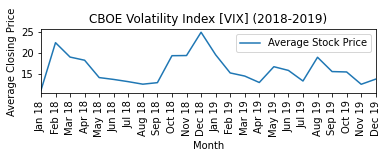

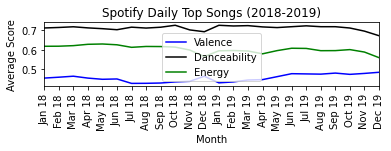

In [37]:
# Stock All
plt.subplot(3, 1, 1)
x_axis = np.arange(1,25)
plt.plot(x_axis, stock_mean_clean_1['Mean Closing Price'],label="Average Stock Price")

plt.legend()

months = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18',
          'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19']
plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("CBOE Volatility Index [VIX] (2018-2019)")
plt.show()

# Music All
plt.subplot(3, 1, 2)
# plt.plot(x_axis, df_music_avg_scores_3['tempo'],color="red",label="Tempo")
plt.plot(x_axis, spotify_mean_3['valence'],color="blue",label="Valence")
# plt.plot(x_axis, df_music_avg_scores_3['key'],color="orange",label="Key")
plt.plot(x_axis, spotify_mean_3['danceability'],color="black",label="Danceability")
plt.plot(x_axis, spotify_mean_3['energy'],color="green",label="Energy")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Score")
plt.title("Spotify Daily Top Songs (2018-2019)")
plt.show()

In [38]:
final_stock_df = stock_mean_clean_1[['Month','Year','Mean Closing Price']]
final_stock_df

,Month,Year,Mean Closing Price
0,1,2018,11.062381
1,2,2018,22.464737
2,3,2018,19.023810
3,4,2018,18.267619
4,5,2018,14.124545
5,6,2018,13.678095
6,7,2018,13.147619
7,8,2018,12.546957
8,9,2018,12.910526
9,10,2018,19.352174


In [61]:
# lag the dataframe by one time period
df1 = vix_stock_data_clean
df2 = spotify_data_final.loc[(spotify_data_final['Year']==2018)|(spotify_data_final['Year']==2019), :]
df1_final = df1.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final = df2.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final.reset_index (drop=True)

# lag the second dataframe by one time period using the shift() method
#df2_lag = df2.shift(3)
#df2_lag = df2_final.iloc[600:].reset_index(drop=True)
#df2_lag = df2[~(df2['date'] < '2019-01-04')]
#df2_lag

,title,Month,Day,Year,tempo,valence,key,danceability,energy
0,Sunflower - Spider-Man: Into the Spider-Verse,1,2,2019,89.911,0.913,2.0,0.760,0.479
1,Wow.,1,2,2019,99.947,0.385,11.0,0.833,0.539
2,Going Bad,1,2,2019,86.003,0.544,4.0,0.889,0.496
3,thank u,1,2,2019,106.960,0.435,1.0,0.724,0.647
4,SICKO MODE,1,2,2019,155.008,0.446,8.0,0.834,0.730
...,...,...,...,...,...,...,...,...,...
145395,No Role Modelz,12,31,2019,100.450,0.463,10.0,0.692,0.521
145396,Lover,12,31,2019,68.534,0.453,7.0,0.359,0.543
145397,all the good girls go to hell,12,31,2019,185.044,0.569,8.0,0.726,0.444
145398,LOYAL,12,31,2019,104.952,0.203,0.0,0.866,0.530


In [65]:
df2_filtered = df2[(df2['Month'] == 1) & (df2['Year'] == 2018) & (df2['Day'] < 4)]
df2_filtered

,title,Month,Day,Year,tempo,valence,key,danceability,energy
207400,rockstar,1,3,2018,159.772,0.1190,5.0,0.577,0.522
207401,No Limit,1,3,2018,175.957,0.4050,1.0,0.838,0.771
207402,Bartier Cardi,1,3,2018,138.043,0.0986,8.0,0.909,0.546
207403,I Fall Apart,1,3,2018,143.950,0.2910,8.0,0.556,0.538
207404,Ric Flair Drip,1,3,2018,100.007,0.3330,9.0,0.880,0.428
...,...,...,...,...,...,...,...,...,...
207995,Never Enough,1,1,2018,86.777,0.2270,8.0,0.277,0.394
207996,DNA,1,1,2018,129.819,0.6870,1.0,0.598,0.775
207997,A Million Dreams,1,1,2018,54.747,0.0998,7.0,0.265,0.312
207998,Bring It Back,1,1,2018,152.040,0.2000,6.0,0.880,0.316


In [75]:
# df1_final['Day Lead'] = df2['Day'] + 3
df1_final = df1.assign(Day = df1['Day'] - 3)
df1_final

,Month,Day,Year,Close
0,1,-1,2018,9.77
1,1,0,2018,9.15
2,1,1,2018,9.22
3,1,2,2018,9.22
4,1,5,2018,9.52
...,...,...,...,...
497,12,20,2019,12.61
498,12,21,2019,12.67
499,12,23,2019,12.65
500,12,24,2019,13.43


In [67]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 250
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     502 non-null    int64  
 1   Day       502 non-null    int64  
 2   Year      502 non-null    int64  
 3   Close     502 non-null    float64
 4   Day Lead  0 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 39.7 KB


In [77]:
# merge the two dataframes on the 'key' column
df_merge = pd.merge(df2_final, df1_final, on=['Day', 'Month', 'Year'])

# display the joined dataframe
print("Lagged Dataframe:")
df_merge
# stock_lead = stock_mean_clean_1.shift(3)
# print("Lagged dataframe:")
# stock_lead = stock_lead.reset_index(drop=True)
# stock_lead

Lagged Dataframe:


,title,Month,Day,Year,tempo,valence,key,danceability,energy,Close
0,rockstar,1,1,2018,159.772,0.1190,5.0,0.577,0.522,9.22
1,No Limit,1,1,2018,175.957,0.4050,1.0,0.838,0.771,9.22
2,Gucci Gang,1,1,2018,119.889,0.6990,5.0,0.936,0.523,9.22
3,Bartier Cardi,1,1,2018,138.043,0.0986,8.0,0.909,0.546,9.22
4,Havana,1,1,2018,104.992,0.4180,7.0,0.768,0.517,9.22
...,...,...,...,...,...,...,...,...,...,...
91195,my boy,12,28,2018,89.936,0.3240,11.0,0.692,0.394,25.42
91196,PICK IT UP,12,28,2018,135.995,0.2870,1.0,0.921,0.467,25.42
91197,Bounce Out With That,12,28,2018,94.932,0.3810,8.0,0.864,0.664,25.42
91198,Mona Lisa,12,28,2018,122.080,0.4890,2.0,0.856,0.694,25.42


In [88]:
df_merge_mean = df_merge.groupby(['Month','Year']).mean().reset_index()
df_merge_mean

,Month,Year,Day,tempo,valence,key,danceability,energy,Close
0,1,2018,14.842105,121.587953,0.451371,5.525382,0.713667,0.617560,11.231053
1,1,2019,14.947368,122.541786,0.428281,5.425833,0.727665,0.595210,19.071052
2,2,2018,13.000000,120.701516,0.457079,5.595509,0.716879,0.618776,23.297059
3,2,2019,12.722222,123.101201,0.432366,5.456257,0.725360,0.595223,15.184444
4,3,2018,13.842105,119.802367,0.460804,5.529281,0.721068,0.620382,18.812632
5,3,2019,13.500000,122.297599,0.440922,5.550365,0.724746,0.594829,14.531000
6,4,2018,13.578947,122.512557,0.453865,5.623585,0.714123,0.628407,17.836842
7,4,2019,13.888889,119.920732,0.444388,5.448504,0.718850,0.579219,12.857222
8,5,2018,14.578947,123.612113,0.446314,5.581554,0.710224,0.629508,13.862105
9,5,2019,15.052632,120.840037,0.460777,5.475699,0.715971,0.596044,17.146842


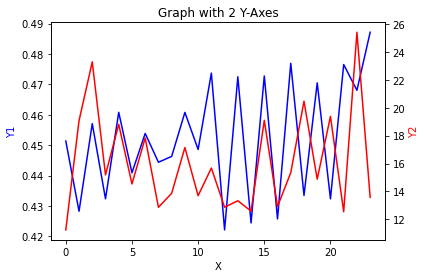

In [89]:
# create figure and axis object
fig, ax1 = plt.subplots()

# plot the first dataset on the primary y-axis
ax1.plot(df_merge_mean['valence'], color='blue')

# set the label for the primary y-axis
ax1.set_ylabel('Y1', color='blue')

# create a secondary axis object for the second dataset
ax2 = ax1.twinx()

# plot the second dataset on the secondary y-axis
ax2.plot(df_merge_mean['Close'], color='red')

# set the label for the secondary y-axis
ax2.set_ylabel('Y2', color='red')

# set the x-axis label and title
ax1.set_xlabel('X')
ax1.set_title('Graph with 2 Y-Axes')

# display the graph
plt.show()